# Analyzing Historical Stock/Revenue Data and Building a Dashboard

### Question 1 - Extracting Tesla Stock Data Using yfinance

In [61]:
import yfinance as yf
import pandas as pd
import numpy as np

In [62]:
tesla = yf.Ticker('TSLA')

In [64]:
tesla = tesla.history(period='max')
tesla.reset_index(inplace=True)

In [65]:
tesla.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [8]:
import requests
from bs4 import BeautifulSoup

In [164]:
url = "https://stockanalysis.com/stocks/tsla/revenue/"

response = requests.get(url).text

soup = BeautifulSoup(response,'html5lib')


In [149]:
soup.find_all('table', class_='svelte-1yyv6eq')
tsla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find_all('tr')[1:]: 
    row_data = row.find_all('td')
    date = row_data[0].text
    revenue = row_data[1].text
    length = len(tsla_revenue)
    print(date,revenue)

Dec 31, 2023 96.77B
Dec 31, 2022 81.46B
Dec 31, 2021 53.82B
Dec 31, 2020 31.54B
Dec 31, 2019 24.58B
Dec 31, 2018 21.46B
Dec 31, 2017 11.76B
Dec 31, 2016 7.00B
Dec 31, 2015 4.05B
Dec 31, 2014 3.20B
Dec 31, 2013 2.01B
Dec 31, 2012 413.26M
Dec 31, 2011 204.24M
Dec 31, 2010 116.74M
Dec 31, 2009 111.94M
Dec 31, 2008 14.74M
Dec 31, 2007 73.00K


IndexError: list index out of range

### Question 3 - Extracting GameStop Stock Data Using yfinance

In [66]:
gme = yf.Ticker('GME')
gme_data = gme.history(period ='max')
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [67]:
url="https://stockanalysis.com/stocks/gme/revenue/"
data= requests.get(url).text
soup = BeautifulSoup(data,"html5lib")

In [150]:
soup.find_all('table', class_='svelte-1yyv6eq')
tsla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find_all('tr')[1:]: 
    row_data = row.find_all('td')
    date = row_data[0].text
    revenue = row_data[1].text
    length = len(tsla_revenue)
    print(date,revenue)
        #gme_revenue = gme_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)

Dec 31, 2023 96.77B
Dec 31, 2022 81.46B
Dec 31, 2021 53.82B
Dec 31, 2020 31.54B
Dec 31, 2019 24.58B
Dec 31, 2018 21.46B
Dec 31, 2017 11.76B
Dec 31, 2016 7.00B
Dec 31, 2015 4.05B
Dec 31, 2014 3.20B
Dec 31, 2013 2.01B
Dec 31, 2012 413.26M
Dec 31, 2011 204.24M
Dec 31, 2010 116.74M
Dec 31, 2009 111.94M
Dec 31, 2008 14.74M
Dec 31, 2007 73.00K


IndexError: list index out of range

### Question 5 - Tesla Stock and Revenue Dashboard

In [159]:
import matplotlib.pyplot as plt

In [160]:
tesla_data = yf.download('TSLA')
tesla_data['Revenue'] = tesla_data['Close'] * tesla_data['Volume']

[*********************100%%**********************]  1 of 1 completed


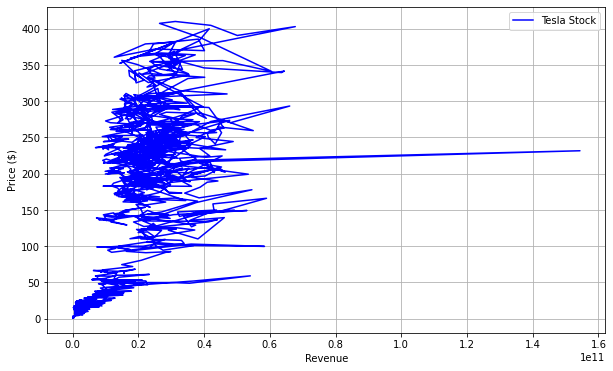

In [180]:
def make_graph(revenue,close):
    plt.figure(figsize=(10, 6))
    plt.plot(revenue, close, color='blue',label='Tesla Stock')
    plt.xlabel('Revenue')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True)
    plt.show()
make_graph(tesla_data['Revenue'],tesla_data['Close'])

### Question 6 - GameStop Stock and Revenue Dashboard

In [167]:
gme_data = yf.download('GME')
gme_data['Revenue'] = gme_data['Close'] * gme_data['Volume']

[*********************100%%**********************]  1 of 1 completed


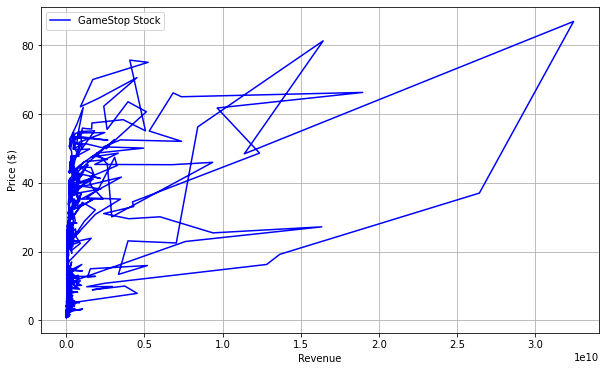

In [179]:
def make_graph(revenue,close):
    plt.figure(figsize=(10, 6))
    plt.plot(revenue, close, color='blue',label='GameStop Stock')
    plt.xlabel('Revenue')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True)
    plt.show()
make_graph(gme_data['Revenue'],gme_data['Close'])